# Section 1.2 — Data in practice

This notebook contains all the code from [Section 1.2 Data in practice](https://minireference.com/static/excerpts/noBSstats/noBSstats_ch01_DATA.pdf#page=34) of the **No Bullshit Guide to Statistics**.

In [1]:
2 + 3

5

#### Notebook setup

### Note for Windows users

If you're on macOS or Linux you can ignore this section—skip to the next section **Data management with Pandas**.

File paths on Windows use the backslash character (`\`) as path separator,
while UNIX operating systems like Linux and macOS use forward slash separator `/` as path separator. 

If you you're on Windows you'll need to manually edit the code examples below to make them work by replacing all occurrences of "`/`" with "`\\`". The double backslash is required to get a literal backslash because the character `\` has special meaning as an escape character.

In [2]:
import os

if os.path.sep == "/":
    print("You're on a UNIX system (Linux or macOS).")
    print("Enjoy civilization!")
elif os.path.sep == "\\":
    print("You're on Windows so you should use \\ as path separator.")
    print("Replace any occurence of / (forward slash) in paths with \\\\ (double-backslash).")

You're on a UNIX system (Linux or macOS).
Enjoy civilization!


The current working directory is a path on your computer where this notebook is running.
The code cell below shows you can **get** you **c**urrent **w**orking **d**irectory.

In [3]:
os.getcwd()

'/Users/ivan/Projects/Minireference/STATSbook/noBSstatsnotebooks/notebooks'

You're in the `notebooks/` directory, which is inside the parent directory `noBSstats/`.

The datasets we'll be using in this notebook are located in the `datasets/` directory, which is sibling of the `notebooks/` directory, inside the parent `noBSstats/`. To access data file `minimal.csv` in the `datasets/` directory from the current directory, we must specify a path that includes the `..` directive (go to parent), then go into the `datasets` directory, then open the file `minimal.csv`.

This combination of "directions" for getting to the file will look different if you're on a Windows system or on a UNIX system. The code below shows the correct path you should access.

In [4]:
if os.path.sep == "/":
    # UNIX path separators
    path = "../datasets/players.csv"
else:
    # Windows path separators
    path = "..\\datasets\\players.csv"

print("The path to the file players.csv in the datasets/ directory is")
path

The path to the file players.csv in the datasets/ directory is


'../datasets/players.csv'

All the code examples provided below assume you're on a UNIX system,
hence the need to manually modify them to use double-backslashes in path strings for the code to work.

## Getting started with JupyterLab

### Download and install JupyterLab Desktop
Follow instructions in the [Python tutorial](./python_tutorial.ipynb) to install JupyterLab Desktop on your computer.

### Download the `noBSstats` notebooks and datasets

### Install requirements

In [5]:
# %pip install -r ../requirements.txt

### Datasets for the book

In [6]:
! ls -1 ../datasets/*csv

../datasets/apples.csv
../datasets/doctors.csv
../datasets/eprices.csv
../datasets/epriceswide.csv
../datasets/kombucha.csv
../datasets/kombuchapop.csv
../datasets/minimal.csv
../datasets/players.csv
../datasets/players_full.csv
../datasets/students.csv
../datasets/visitors.csv


### Interactive notebooks for each section

In [7]:
!ls ../notebooks/*ipynb

../notebooks/11_intro_to_data.ipynb
../notebooks/12_data_in_practice.ipynb
../notebooks/13_descriptive_statistics.ipynb
../notebooks/21_discrete_random_vars.ipynb
../notebooks/22_multiple_random_vars.ipynb
../notebooks/23_inventory_discrete_dists.ipynb
../notebooks/24_calculus_prerequisites.ipynb
../notebooks/25_continuous_random_vars.ipynb
../notebooks/26_inventory_continuous_dists.ipynb
../notebooks/27_random_var_generation.ipynb
../notebooks/28_random_samples.ipynb
../notebooks/31_estimators.ipynb
../notebooks/32_confidence_intervals.ipynb
../notebooks/33_intro_to_NHST.ipynb
../notebooks/34_analytical_approx.ipynb
../notebooks/35_two_sample_tests.ipynb
../notebooks/36_design.ipynb
../notebooks/37_inventory_stats_tests.ipynb
../notebooks/41_introduction_to_LMs.ipynb
../notebooks/99_mean_estimation_details.ipynb
../notebooks/99_proportions_estimators.ipynb
../notebooks/OLD34_analytical_approximation.ipynb
../notebooks/cut_material.ipynb
../notebooks/one_sample_known_mean_unknown_var.i

### Exercises notebooks

In [8]:
!ls ../exercises/*ipynb

../exercises/exercises_12_practical_data.ipynb
../exercises/exercises_13_descr_stats.ipynb
../exercises/exercises_21_discrete_RVs.ipynb
../exercises/exercises_31_estimtors.ipynb
../exercises/exercises_32_confidence_intervals.ipynb
../exercises/exercises_33_intro_to_NHST.ipynb
../exercises/exercises_35_two_sample_tests.ipynb
../exercises/problems_1_data.ipynb


#### Players dataset

In [9]:
import pandas as pd
players = pd.read_csv("../datasets/players.csv")

In [10]:
players.head()

,username,country,age,ezlvl,time,points,finished
0,mary,us,38,0,124.94,418,0
1,jane,ca,21,0,331.64,1149,1
2,emil,fr,52,1,324.61,1321,1
3,ivan,ca,50,1,39.51,226,0
4,hasan,tr,26,1,253.19,815,0


## Data management with Pandas

The first step is to import the Pandas library.
We'll follow the standard convention of importing the `pandas` module under the alias `pd`.

In [11]:
import pandas as pd

If you get an error when running this code cell,
make sure you go back to the above step and run `%pip install -r ../requirements.txt`.
Alternatively,
you can run `%pip install pandas` to install just the Pandas library.

### Data frames

Loading the dataset `minimal.csv`

In [12]:
# !cat "../datasets/players.csv"

In [13]:
players = pd.read_csv("../datasets/players.csv")
players

,username,country,age,ezlvl,time,points,finished
0,mary,us,38,0,124.94,418,0
1,jane,ca,21,0,331.64,1149,1
2,emil,fr,52,1,324.61,1321,1
3,ivan,ca,50,1,39.51,226,0
4,hasan,tr,26,1,253.19,815,0
5,jordan,us,45,0,28.49,206,0
6,sanjay,ca,27,1,350.00,1401,1
7,lena,uk,23,0,408.76,1745,1
8,shuo,cn,24,1,194.77,1043,0
9,r0byn,us,59,0,255.55,1102,0


In [14]:
# ALT.
filepath = os.path.join("..", "datasets", "players.csv")
players = pd.read_csv(filepath)

### Data frame properties

In [15]:
type(players)

pandas.core.frame.DataFrame

In [16]:
players.index

RangeIndex(start=0, stop=12, step=1)

In [17]:
players.columns

Index(['username', 'country', 'age', 'ezlvl', 'time', 'points', 'finished'], dtype='object')

In [18]:
players.shape

(12, 7)

In [19]:
players.dtypes

username     object
country      object
age           int64
ezlvl         int64
time        float64
points        int64
finished      int64
dtype: object

In [20]:
players.head(3)
# players.tail(2)
# players.sample(3)

,username,country,age,ezlvl,time,points,finished
0,mary,us,38,0,124.94,418,0
1,jane,ca,21,0,331.64,1149,1
2,emil,fr,52,1,324.61,1321,1


In [21]:
players.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   username  12 non-null     object 
 1   country   12 non-null     object 
 2   age       12 non-null     int64  
 3   ezlvl     12 non-null     int64  
 4   time      12 non-null     float64
 5   points    12 non-null     int64  
 6   finished  12 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.0 KB


In [22]:
# players.axes
# players.memory_usage()
# players.values

### Accessing values in a DataFrame

#### Selecting individual values

In [23]:
# Emil's points
players.loc[2,"points"]

1321

#### Selecting entire rows

In [24]:
# Sanjay's data
row6 = players.loc[6,:]  # == players.loc[6]
row6

username    sanjay
country         ca
age             27
ezlvl            1
time         350.0
points        1401
finished         1
Name: 6, dtype: object

In [25]:
# Rows of the dataframe are Series objects
type(row6)

pandas.core.series.Series

The `index` of the series `row6` is the same as the columns index of the data frame `players`.

In [26]:
row6.index

Index(['username', 'country', 'age', 'ezlvl', 'time', 'points', 'finished'], dtype='object')

To access individual values, use the square bracket notation.

In [27]:
row6["age"]

27

#### Selecting entire columns

In [28]:
ages = players["age"]
ages

0     38
1     21
2     52
3     50
4     26
5     45
6     27
7     23
8     24
9     59
10    18
11    22
Name: age, dtype: int64

In [29]:
type(ages)

pandas.core.series.Series

In [30]:
ages.index

RangeIndex(start=0, stop=12, step=1)

In [31]:
ages.values

array([38, 21, 52, 50, 26, 45, 27, 23, 24, 59, 18, 22])

In [32]:
# ALT1.
# players["age"].equals( players.loc[:,"age"] )

In [33]:
# ALT2.
# players["age"].equals( players.age )

In [34]:
ages[6]

27

#### Selecting multiple columns

In [35]:
players[["username", "country"]]

,username,country
0,mary,us
1,jane,ca
2,emil,fr
3,ivan,ca
4,hasan,tr
5,jordan,us
6,sanjay,ca
7,lena,uk
8,shuo,cn
9,r0byn,us


#### Selecting subsets of the data frame

We rarely need to do this,
but for the purpose of illustration of the `loc` syntax,
here is the code for selecting the `time` and `points` columns
from the last three rows of the `players` data frame.

In [52]:
players.loc[9:12, ["time","points"]]

,time,points
9,255.55,1102
10,303.66,1209
11,381.97,1491


### Statistical calculations using Pandas

In [36]:
ages = players["age"]  # == players.loc[:,"age"]
ages

0     38
1     21
2     52
3     50
4     26
5     45
6     27
7     23
8     24
9     59
10    18
11    22
Name: age, dtype: int64

In [37]:
type(ages)

pandas.core.series.Series

In [38]:
ages.index

RangeIndex(start=0, stop=12, step=1)

In [39]:
ages.name

'age'

In [40]:
players.loc[6]

username    sanjay
country         ca
age             27
ezlvl            1
time         350.0
points        1401
finished         1
Name: 6, dtype: object

#### Series methods

In [41]:
ages.count()

12

In [42]:
# # ALT
# len(ages)

In [43]:
ages.sum()

405

In [44]:
ages.sum() / ages.count()

33.75

In [45]:
ages.mean()

33.75

In [46]:
ages.std()

14.28365244861157

### Selecting only certain rows (filtering)


To select only rows where `ezlvl` is `1`, we first build the boolean selection mask...

In [47]:
mask = players["ezlvl"] == 1
mask

0     False
1     False
2      True
3      True
4      True
5     False
6      True
7     False
8      True
9     False
10    False
11     True
Name: ezlvl, dtype: bool

... then select the rows using the mask.

In [48]:
print(players[mask])

   username country  age  ezlvl    time  points  finished
2      emil      fr   52      1  324.61    1321         1
3      ivan      ca   50      1   39.51     226         0
4     hasan      tr   26      1  253.19     815         0
6    sanjay      ca   27      1  350.00    1401         1
8      shuo      cn   24      1  194.77    1043         0
11     joro      bg   22      1  381.97    1491         1


The above two step process can be combined into a more compact expression:

In [49]:
players[players["ezlvl"]==1]

,username,country,age,ezlvl,time,points,finished
2,emil,fr,52,1,324.61,1321,1
3,ivan,ca,50,1,39.51,226,0
4,hasan,tr,26,1,253.19,815,0
6,sanjay,ca,27,1,350.00,1401,1
8,shuo,cn,24,1,194.77,1043,0
11,joro,bg,22,1,381.97,1491,1


In [50]:
# BONUS. mask for selecting players with ezlvl=1 and time greater than 200 mins
# players[(players["ezlvl"] == 1) & (players["time"] >= 200)]

In [51]:
# BONUS. mask for selecting USA and Canada players
# players["country"].isin(["us","ca"])

### Sorting data frames and ranking

In [80]:
players.sort_values("time")

,username,country,age,ezlvl,time,points,finished
5,jordan,us,45,0,28.49,206,0
3,ivan,ca,50,1,39.51,226,0
0,mary,us,38,0,124.94,418,0
8,shuo,cn,24,1,194.77,1043,0
4,hasan,tr,26,1,253.19,815,0
9,r0byn,us,59,0,255.55,1102,0
10,anna,pl,18,0,303.66,1209,1
2,emil,fr,52,1,324.61,1321,1
1,jane,ca,21,0,331.64,1149,1
6,sanjay,ca,27,1,350.00,1401,1


In [79]:
players["time"].rank()

0      3.0
1      9.0
2      8.0
3      2.0
4      5.0
5      1.0
6     10.0
7     12.0
8      4.0
9      6.0
10     7.0
11    11.0
Name: time, dtype: float64

### Grouping and aggregation

In [62]:
players.groupby("ezlvl")

In [63]:
players.groupby("ezlvl")["time"]

In [64]:
players.groupby("ezlvl")["time"].mean()

ezlvl
0    242.173333
1    257.341667
Name: time, dtype: float64

In [65]:
print(players.groupby("ezlvl")["time"].aggregate(["sum", "mean"]))

           sum        mean
ezlvl                     
0      1453.04  242.173333
1      1544.05  257.341667


In [66]:
players.groupby("ezlvl")["time"] \
  .agg(["sum", "mean"])

,sum,mean
ezlvl,,
0,1453.04,242.173333
1,1544.05,257.341667


In [67]:
(players
  .groupby("ezlvl")["time"]
  .agg(["sum", "mean", "max"])
)

,sum,mean,max
ezlvl,,,
0,1453.04,242.173333,408.76
1,1544.05,257.341667,381.97


## Data visualization with Seaborn

The first step is to import the `seaboarn` module
under the alias `sns`.

In [68]:
import seaborn as sns

If you get an error when running this code cell,
make sure you go back to the above step and run `%pip install -r ../requirements.txt`.
Alternatively,
you can run `%pip install seaborn` to install just the Seaborn library.

<Axes: xlabel='time'>

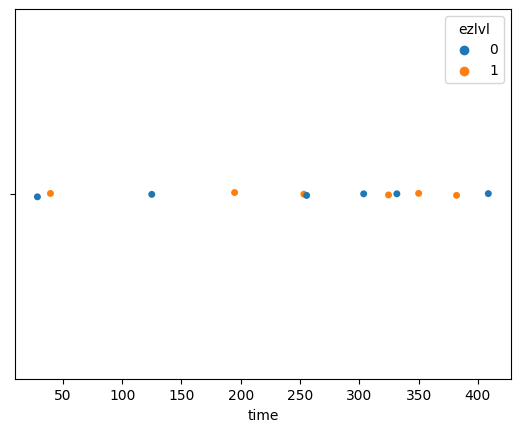

In [69]:
sns.stripplot(x="time", hue="ezlvl", jitter=0.01, data=players)

In [70]:
# sns.scatterplot(x="time", y="points", data=players)
# sns.lineplot(x="time", y="points", data=players)

<Axes: xlabel='time', ylabel='ezlvl'>

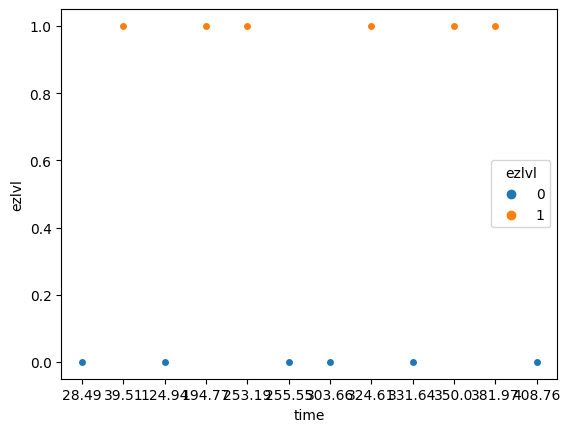

In [71]:
import seaborn as sns
# sns.scatterplot(x="ezlvl", y="time", hue="ezlvl", data=players)
sns.stripplot(y="ezlvl", x="time", hue="ezlvl", data=players)

### Studying the effect of `ezlvl` on `time`

We want to study the relation `time ~ ezlvl`,
which will tell us whether the "easy level" version of the game
leads to improvements in user retention.

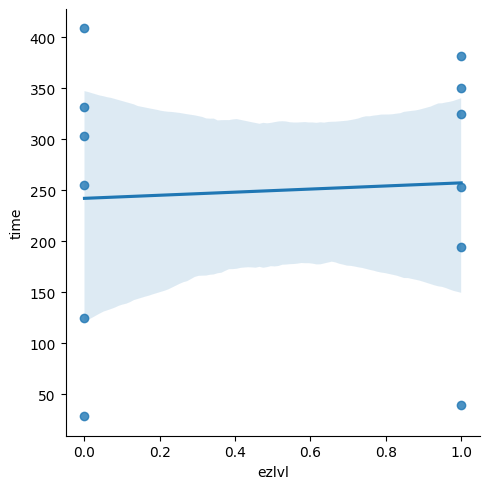

In [72]:
import seaborn as sns
sns.lmplot(x="ezlvl", y="time", data=players)

### Use case 2
In Sec 1.1 use `time ~ age` to look for correlation between age and engagement.

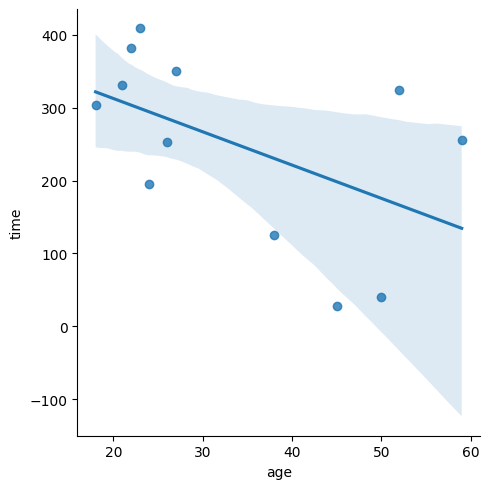

In [73]:
sns.lmplot(x="age", y="time", data=players)

#### Use case 3	

In Sec 1.1	`jobstatus` (non-existent)	explain possible confounding of `time~age` correlation by confounder var. "employed" no time to play game vs. "unemployed" has time to play game, with young ppl being more likely to be unemployed

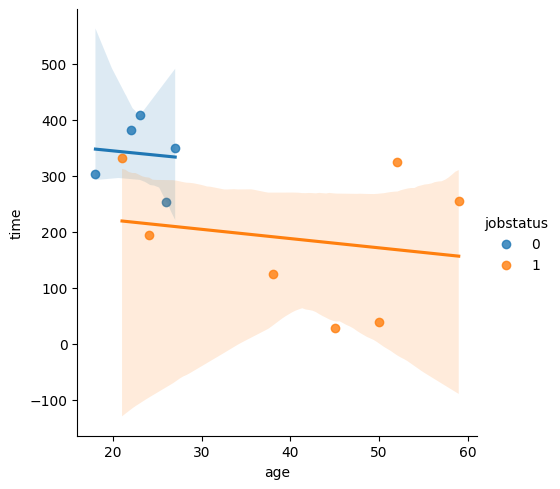

In [74]:
players_full = pd.read_csv("../datasets/players_full.csv")

sns.lmplot(x="age", y="time", hue="jobstatus", data=players_full)

## Real-world datasets

In [83]:
# figures only
datasets_list = [
    {
        "index": "",
        "filename": 'players.csv',
        "sections": "1.1, 1.2",
        "uses": "Intro to Pandas and Seaborn",
     },
    # {
    #     "filename": 'players_full.csv',
    #  },
    {
        "index":1,
        "filename": 'apples.csv',
        "client name": "Alice",
        "sections": "3.1, 3.5",
        "uses": "Estimation",
     },
    {
        "index":2,
        "filename": 'eprices.csv',
        "client name": "Bob",
        "sections": "3.1, 3.5",
        "uses": "Esimtation and hypothesis testing",
     },
    {
        "index":3,
        "filename": 'students.csv',
        "client name": "Charlotte",
        "sections": "1.3, 3.1, 3.5, 4.x",
        "uses": "Descr. stats and hypothesis testing",
    },
    {
        "index":4,
        "filename": 'kombucha.csv',
        "client name": "Khalid",
        "sections": "3.1, 3.2, 3.3, 3.4",
        "uses": "Estimation and hypothesis testing",
     },
    {
        "index":5,
        "filename": 'doctors.csv',
        "client name": "Dan",
        "sections": "3.1, 3.5, 4.x",
        "uses": "Hypothesis testing",
     },
    {
        "index":6,
        "filename": 'visitors.csv',
        "client name": "Vanessa",
        "sections": "3.6",
        "uses": "Test of two proportions",
     },
    {
        "index": "",
        "filename": 'minimal.csv',
        "shape": "5x4",
        "sections": "Appendix D",
        "uses": "Pandas data frame maniulations",
    },
    # {
    #     "filename": 'minimal.csv',
    #     "directory": "datasets/raw/",
    #     "shape": "7x4",
    #     "sections": "Appendix D",
    #     "uses": "Example of with missing values",
    # },
]


# fill in directory
for ds in datasets_list:
    if not "directory" in ds:
        ds["directory"] = "datasets/"


# calculate shape
for ds in datasets_list:
    ds_path = os.path.join("..", ds["directory"], ds["filename"])
    ds_df = pd.read_csv(ds_path)
    ds["shape"] = str(ds_df.shape[0]) + "x" + str(ds_df.shape[1])


datasets_df = pd.DataFrame(datasets_list)
datasets_df = datasets_df[[
    "index",
    "client name",
    "filename",
    "shape",
    "sections",
]]

pd.set_option('display.width', 400)
print(datasets_df.to_latex(index=False))

\begin{tabular}{lllll}
\toprule
index & client name &     filename &  shape &           sections \\
\midrule
      &         NaN &  players.csv &   12x7 &           1.1, 1.2 \\
    1 &       Alice &   apples.csv &   30x1 &           3.1, 3.5 \\
    2 &         Bob &  eprices.csv &   18x2 &           3.1, 3.5 \\
    3 &   Charlotte & students.csv &   15x5 & 1.3, 3.1, 3.5, 4.x \\
    4 &      Khalid & kombucha.csv &  347x2 & 3.1, 3.2, 3.3, 3.4 \\
    5 &         Dan &  doctors.csv &  224x4 &      3.1, 3.5, 4.x \\
    6 &     Vanessa & visitors.csv & 2000x3 &                3.6 \\
      &         NaN &  minimal.csv &    5x4 &         Appendix D \\
\bottomrule
\end{tabular}



/var/folders/wc/2r44j8gs4gn56t1xtw5f6wlm0000gn/T/ipykernel_75073/541578538.py:96: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(datasets_df.to_latex(index=False))


### Apple weights

### Electricity prices

### Students' scores

### Kombucha volumes

### Doctors' sleep study

### Website visitors